In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')

/var/folders/z6/989ctq0d7vg21wbnl9sb_yh80000gn/T/ipykernel_21070/646402083.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
CONSTANT_NAME = "opt"

In [3]:
start =2
budget_list = []
for i in range(30):
    new_start = int(start * (1.5))
    if new_start - start > 500:
        start += 500
    else:
        start = new_start
    budget_list.append(start)
max_budget = budget_list[-1]

In [4]:
pdf_errors = {10:{}, 20:{}}
dt_list = {10:{}, 20:{}}
opt_res = {10:{}, 20:{}}
resolution_list = ["mfed_75", "mfed_early_75"]
resolution_list = ["mfed_90", "mfed_50","mfed_75", "mfed_early_75", "mfed", "mfed_early", 2,4,8]
resolution_list = ["mfed",2,4,8]
#resolution_list = ["mfed_early_90"]
resolution_list = ["mfed_early",2,4,8]
melt_rate_list = [ (10,"low"),(20,"high")]


tmp_dir = "08_06_17_54"
for melt_rate,melt_label in melt_rate_list: #, "high"
    for resolution in resolution_list:
    #for resolution in [2,4,8,"mfed", "mfed_75", "mfed_early", "mfed_early_75"]: #, "mfed_75", , "mfed_50" #"mfed", "average", 2,4,8, "mfed_opt",
        tmp = pickle.load(open(f"./../assets/plots_data/fig_7/{tmp_dir}/{melt_label}_{resolution}.pkl", 'rb'))
        pdf_errors[melt_rate][resolution] = tmp["pdf_errors"][melt_rate][resolution]
        dt_list[melt_rate][resolution] = tmp["dt_list"][melt_rate][resolution]
        print(tmp.keys())
        try:
            opt_res[melt_rate][resolution] = tmp["opt_res"][melt_rate][resolution]
        except:
            pass
        #param_list.append()

dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])
dict_keys(['mean_errors', 'pdf_errors', 'dt_list', 'opt_res'])


In [7]:
data_for_df

[{'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 6, 'budget': 9},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 6, 'budget': 9},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 6, 'budget': 13},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 6, 'budget': 13},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 6, 'budget': 13},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 3, 'budget': 13},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 3, 'budget': 13},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 6, 'budget': 13},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 3, 'budget': 19},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 3, 'budget': 19},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 3, 'budget': 19},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 3, 'budget': 19},
 {'resolution': 'mfed_early', 'melt': 10, 'chosen_res': 3, 'budget': 19},
 {'resolution': 'mfed_early', 'melt': 10

          res  budget  melt_label     error
0  mfed_early       9          10  0.369104
1  mfed_early       9          10  0.329376
2  mfed_early      13          10  0.198291
3  mfed_early      13          10  0.207758
4  mfed_early      13          10  0.212209
10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


20
./../assets/plots/thesis/opt/opt_perf.pdf


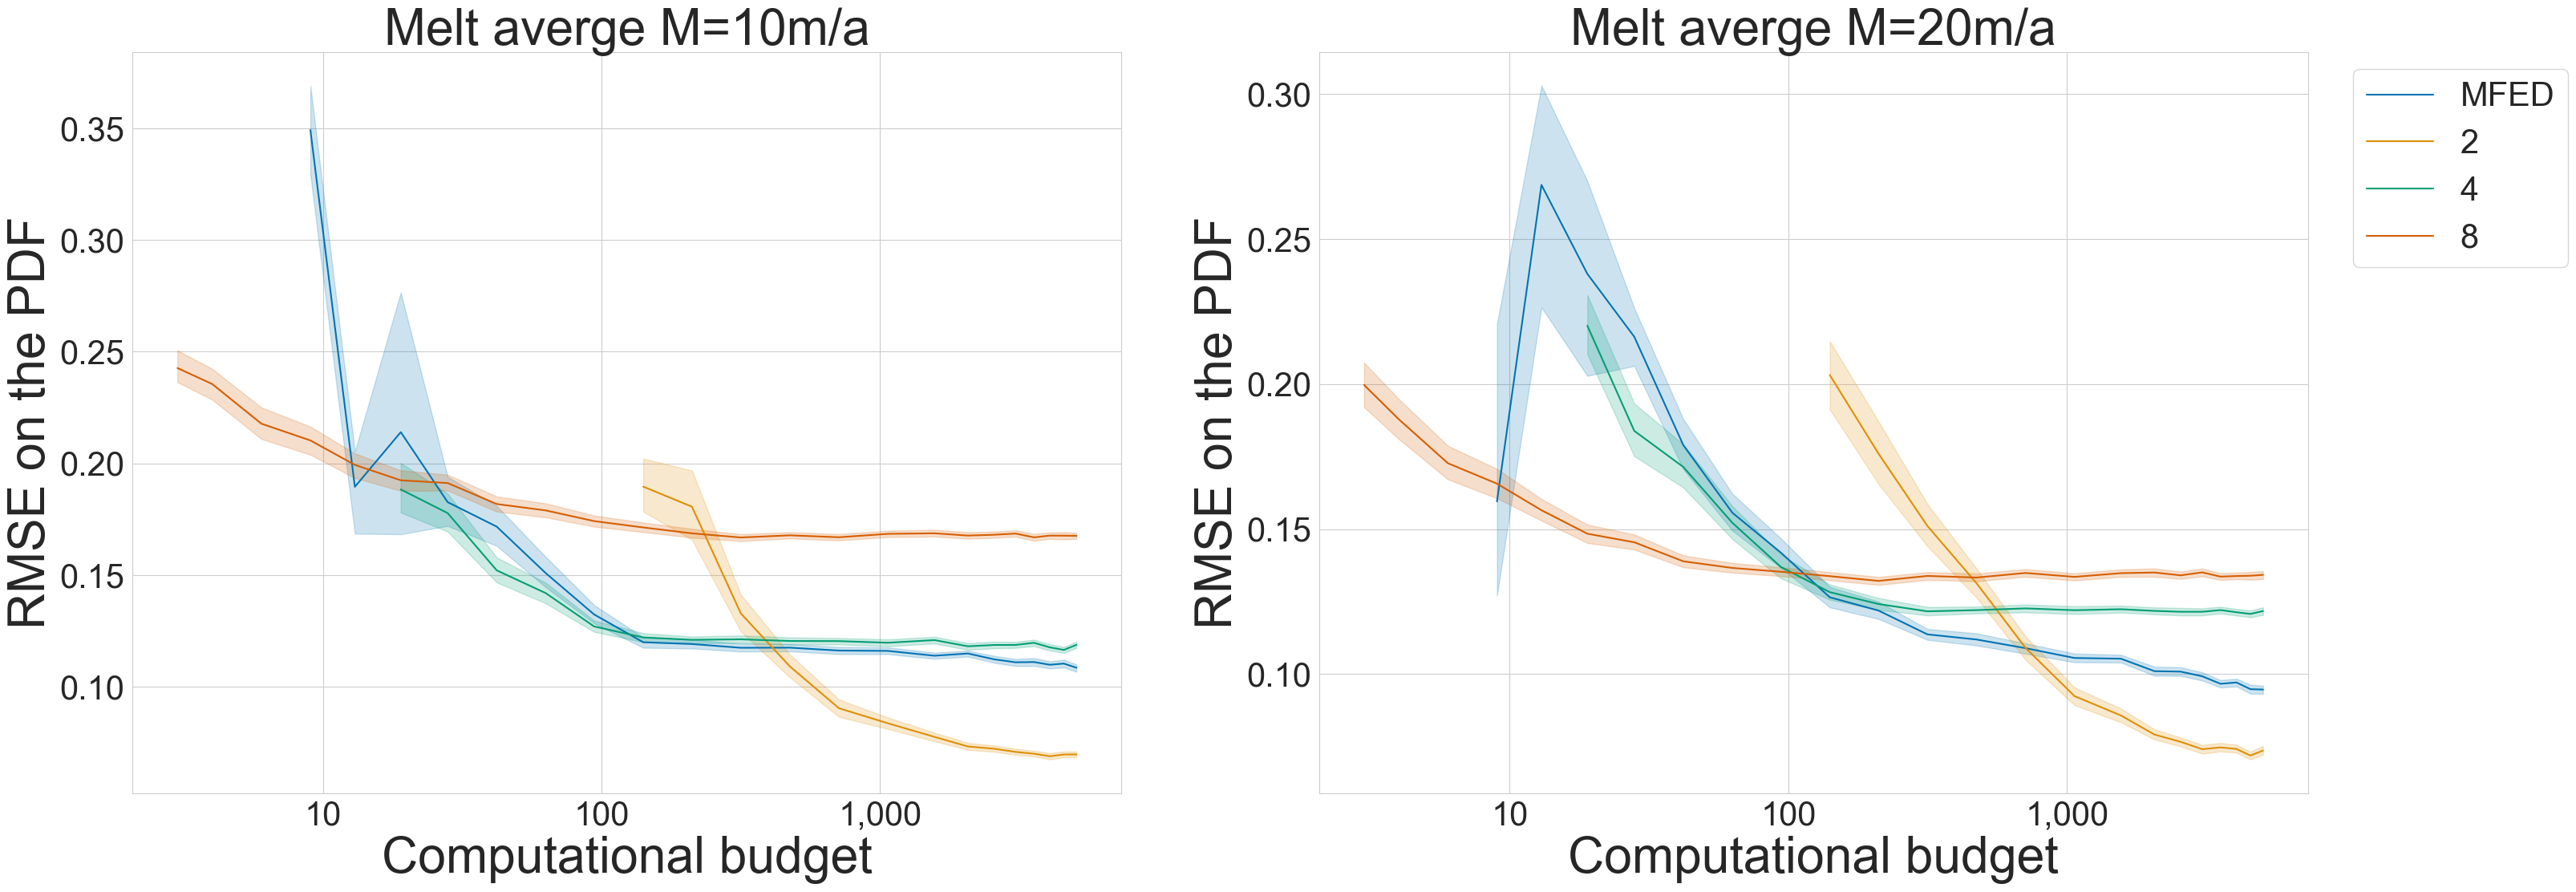

In [20]:


# Initialize an empty list to store the data
data_for_df = []

# Iterate through the pdf_errors dictionary to extract the necessary information
for melt_label, res_dict in pdf_errors.items():
    for res, budget_dict in res_dict.items():
        for budget, error_list in budget_dict.items():
            # For each error in the error_list, append a new record to the list
            if error_list is not None:
                for error in error_list:
                    data_for_df.append({
                        "res": str(res),
                        "budget": budget,
                        "melt_label": melt_label,
                        "error": error
                    })

# Convert the list of data into a pandas DataFrame
pdf_errors_df = pd.DataFrame(data_for_df)


# Display the first few rows of the DataFrame to verify
print(pdf_errors_df.head())

pdf_errors_df.loc[pdf_errors_df["res"] == "mfed", "res"] = "MFED"
pdf_errors_df.loc[pdf_errors_df["res"] == "mfed_early", "res"] = "MFED"

sns.set_palette('colorblind')
sns.set_style('whitegrid')
mpl.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(35,12))

for idx, label in enumerate(pdf_errors_df['melt_label'].unique()):
    print(label)
    plt.subplot(1,2,idx+1)
    legend = True if idx == 1 else False
    sns.lineplot(data=pdf_errors_df[pdf_errors_df['melt_label'] == label], x="budget", y="error", hue="res", legend=legend)
    ax = plt.gca()
    ax.set_xscale('log')
    #ax.set_yscale('log')

    # Adjust tick label size
    ax.tick_params(axis='both', which='major', labelsize=30)
    ax.tick_params(axis='both', which='minor', labelsize=30)

    # Ensure a reasonable number of ticks
    ax.xaxis.set_major_locator(plt.LogLocator(numticks=5))
    #ax.yaxis.set_major_locator(plt.LogLocator(numticks=5))

    # Format tick labels
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:,.0f}"))
    #ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f"{y:.2f}"))  #
    plt.xlabel("Computational budget", fontsize=45)
    plt.ylabel("RMSE on the PDF", fontsize=45)
    plt.legend(bbox_to_anchor=(1.28, 1), loc='upper right', fontsize=30, title_fontsize=45)
    plt.title(f"Melt averge M={label}m/a", fontsize=45)
path = f"./../assets/plots/thesis/{CONSTANT_NAME}/{CONSTANT_NAME}_perf.pdf"
print(path)
plt.savefig(path,bbox_inches='tight')
